In [1]:
from datetime import datetime as dt
import json
import pandas as pd
import time

import pandas as pd
import os
import re
from datetime import datetime as dt
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import numpy as np
import requests
import time
import random
import pickle
import json

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
def read_csv_file(path):
    try:
        df = pd.read_csv(path, encoding='utf-8')
    except:
        df = pd.read_csv(path, encoding='latin1')
    return df


In [3]:
path_to_csv_Video_API_df =  'C:\\Users\\souro\\Desktop\\VS Code\\Youtube Trending\\YouTube_data\\processed_data\\Video_API.csv'
Video_API_df = read_csv_file(path_to_csv_Video_API_df)
path_to_csv_Video_df =      'C:\\Users\\souro\\Desktop\\VS Code\\Youtube Trending\\data\\Video_df.csv'
Video_df = read_csv_file(path_to_csv_Video_df)
path_to_csv_Channel_API_df ='C:\\Users\\souro\\Desktop\\VS Code\\Youtube Trending\\YouTube_data\\processed_data\\Channel_API.csv'
Channel_API_df = read_csv_file(path_to_csv_Channel_API_df)

In [4]:
Video_API_df.head()
Channel_API_df.head()
Video_df.head()

,video_id,channel_id,channel_title,default_language,default_audio_language,duration,daption,region_restriction_blocked,region_restriction_allowed
0,8JrkJjNKIs0,UCcPcua2PF7hzik2TeOBx3uw,faz,NaN,de,PT1M30S,False,NaN,NaN
1,KJx2XoLvWRs,UCt7sv-NKh44rHAEb-qCCxvA,Wylsacom,ru,ru,PT15M1S,False,NaN,NaN
2,fe2IVeAjNFM,UCh2ku44ACi1h6TlGNF6RKvA,Акыркы Кабарлар - Санжар Калматай,NaN,ky,PT2M18S,False,NaN,NaN
3,RlDomVmBz4M,UCtqv_K5xr-OSViDaFgsFbPQ,Alina Rin,NaN,ru,PT3H51M23S,False,NaN,NaN
4,PBl0UnP_5No,UCg7qv41QQCzkXf04PfxPl0g,Don Reality,NaN,NaN,PT2M27S,False,NaN,NaN


,channel_id,channel_title,channel_description,channel_published_at,country,default_language,keywords,google_analytics,moderate_comments,topic_categories
0,UCZkDKkpv7Eg1e49Ju50Nt7A,Vspishka,"Сергей ""Vspishka"" (Вспышка). С малых лет люблю...",2009-01-29T20:53:47Z,RU,NaN,"vspishka ""сергей вспышка"" vspishkagame ""сергей...",True,False,Video_game_culture | Role-playing_video_game |...
1,UCzd-QY2q6hFyNb_bn9vtWQw,APRIL,APRIL Official YouTube Channel,2015-07-13T12:54:18Z,KR,NaN,NaN,False,False,Entertainment | Music_of_Asia | Music | Pop_music
2,UCRiMhZrS2VNyHVMQjQeSU4A,Радио Комсомольская Правда,Официальный канал Радио «Комсомольская Правда»...,2013-12-05T12:41:04Z,RU,NaN,"""Комсомольская правда"" Делягин Баранец Старико...",False,False,Politics | Society
3,UCCpwMG0qZkr62FNZktfcvYg,Mathieu Sommet,Vidéaste indépendant depuis 2011. En ce moment...,2011-02-27T22:04:56Z,FR,NaN,"""mathieu sommet"" humour sketch ""salut les geek...",False,False,Film | Entertainment
4,UCP2W8suyl0Wrbkur4CkJP5g,Altin Bubba,"Hey, \n\nmein Name ist Altin, und mein Ziel is...",2015-11-08T15:15:01Z,DE,NaN,Altin Bubba,False,False,Hip_hop_music | Lifestyle_(sociology)


,index,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
0,0,2kyS6SvSYSE,14-11-2017,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,13-11-2017 17:13,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US
1,1,1ZAPwfrtAFY,14-11-2017,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,13-11-2017 07:30,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,"One year after the presidential election, John...",US
2,2,5qpjK5DgCt4,14-11-2017,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,12-11-2017 19:05,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,US
3,3,puqaWrEC7tY,14-11-2017,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,13-11-2017 11:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,Today we find out if Link is a Nickelback amat...,US
4,4,d380meD0W0M,14-11-2017,I Dare You: GOING BALD!?,nigahiga,Entertainment,12-11-2017 18:01,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,I know it's been a while since we did this sho...,US


In [6]:
Video_API_df.head()

,video_id,channel_id,channel_title,default_language,default_audio_language,duration,daption,region_restriction_blocked,region_restriction_allowed
0,8JrkJjNKIs0,UCcPcua2PF7hzik2TeOBx3uw,faz,NaN,de,PT1M30S,False,NaN,NaN
1,KJx2XoLvWRs,UCt7sv-NKh44rHAEb-qCCxvA,Wylsacom,ru,ru,PT15M1S,False,NaN,NaN
2,fe2IVeAjNFM,UCh2ku44ACi1h6TlGNF6RKvA,Акыркы Кабарлар - Санжар Калматай,NaN,ky,PT2M18S,False,NaN,NaN
3,RlDomVmBz4M,UCtqv_K5xr-OSViDaFgsFbPQ,Alina Rin,NaN,ru,PT3H51M23S,False,NaN,NaN
4,PBl0UnP_5No,UCg7qv41QQCzkXf04PfxPl0g,Don Reality,NaN,NaN,PT2M27S,False,NaN,NaN


In [7]:
Video_df.head()

,index,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
0,0,2kyS6SvSYSE,14-11-2017,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,13-11-2017 17:13,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US
1,1,1ZAPwfrtAFY,14-11-2017,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,13-11-2017 07:30,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,"One year after the presidential election, John...",US
2,2,5qpjK5DgCt4,14-11-2017,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,12-11-2017 19:05,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,US
3,3,puqaWrEC7tY,14-11-2017,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,13-11-2017 11:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,Today we find out if Link is a Nickelback amat...,US
4,4,d380meD0W0M,14-11-2017,I Dare You: GOING BALD!?,nigahiga,Entertainment,12-11-2017 18:01,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,I know it's been a while since we did this sho...,US


In [5]:
Video_df['trending_date']=Video_df['trending_date'].str.replace('-','/')
Video_df['publish_time']=Video_df['publish_time'].str.replace('-','/')
Video_df['trending_date'] =  pd.to_datetime(Video_df['trending_date'], format='%d/%m/%Y')
Video_df['publish_time'] =  pd.to_datetime(Video_df['publish_time'], format='%d/%m/%Y %H:%M')

In [6]:
Video_df['time_to_trending']=Video_df['trending_date']-Video_df['publish_time']
Video_df['hours_to_trending']=Video_df['time_to_trending']/np.timedelta64(1, 'h') 

<BarContainer object of 7 artists>

Text(0.5, 0, 'Countries of origin')

Text(0, 0.5, 'Average taken for a video to trend')

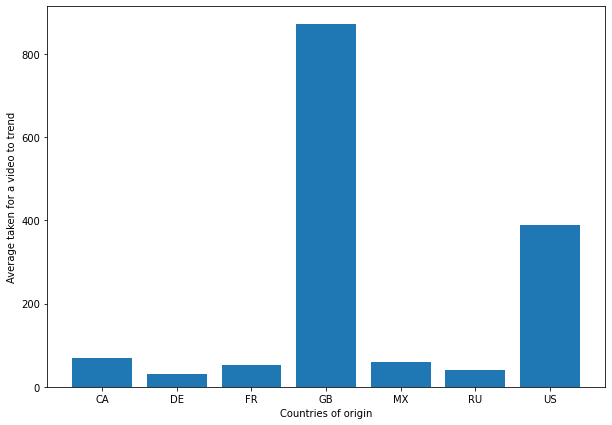

In [7]:
#The average time taken by a video in each country to trend
avg_time_by_country = Video_df['hours_to_trending'].groupby(Video_df['country']).mean()
country= avg_time_by_country.keys()
average =[]
for x in country:
    average.append(avg_time_by_country[x])

fig = plt.figure(figsize =(10, 7))
plt.bar(country, average)
plt.xlabel("Countries of origin")
plt.ylabel("Average taken for a video to trend") 
# Show Plot
plt.show()


(array([0.02438314, 0.02447252, 0.02238439, 0.02214877, 0.02821002,
        0.02892096, 0.01748095, 0.0213972 , 0.02715783, 0.03007471,
        0.03066783, 0.03696065, 0.04215253, 0.05383223, 0.06575567,
        0.080791  , 0.09605382, 0.09134944, 0.06695005, 0.05928411,
        0.05229254, 0.05011097, 0.04037722, 0.03026971]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <BarContainer object of 24 artists>)

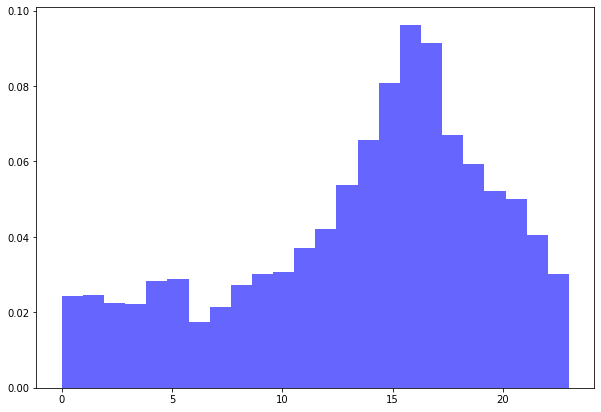

In [40]:
#What part of the day are trending videos published?
Video_df['time'] = Video_df['publish_time'].apply(lambda x : str(x.time()))
Video_df['time_in_hr'] = Video_df['time'].apply(lambda x : (int(x.split(':')[0]))+(int(x.split(':')[1])/60))
x = Video_df['time_in_hr'].astype(int)
# Creating histogram
fig, axs = plt.subplots(figsize =(10, 7))
plt.hist(x, bins = 24, density=True, alpha=0.6, color='b')

# x-axis label
# plt.set_xlabel('Time in 24 Hours format')
 
# # y-axis label
# plt.set_ylabel('Total number trending videos')
plt.show()


country
CA     69.645188
DE     29.708304
FR     52.226412
GB    870.229541
MX     58.383795
RU     40.624663
US    387.907885
Name: hours_to_trending, dtype: float64

country
CA    40614
DE    40573
FR    40457
GB    38484
MX    15666
RU    40428
US    40634
Name: hours_to_trending, dtype: int64

-20.85

In [ ]:

min(Video_df['hours_to_trending'])
# Creating distribution
x = Video_df['hours_to_trending'] 
# Creating histogram
fig, axs = plt.subplots(figsize =(10, 7))
plt.hist(x, bins = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250], density=True, alpha=0.6, color='b')

# Show plot
plt.show()

In [70]:
#Finding the average time to trending
avg_time_trending = Video_df['hours_to_trending'].mean() 
print("The average time it took for a video to trend is:",avg_time_trending, 'hours')

The average time it took for a video to trend is: 225.6362543604198 hours


C:\Users\souro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours_to_trending'>

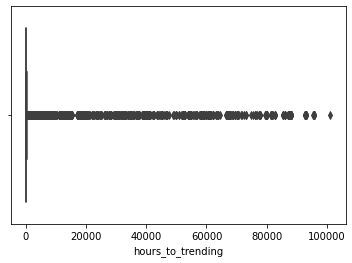

In [72]:
import seaborn as sns
sns.boxplot(Video_df['hours_to_trending'])

In [ ]:
Q1 = np.percentile(Video_df['hours_to_trending'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(Video_df['hours_to_trending'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

In [ ]:
IQR
upper = Q3 +1.5*IQR
upper
lower = Q1 - 1.5*IQR
lower

# Above Upper bound
upper = Video_df['hours_to_trending'] >= (Q3+1.5*IQR)
 
print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = Video_df['hours_to_trending'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))

Text(0.5, 0, 'Time to trend')

Text(0, 0.5, 'Views')

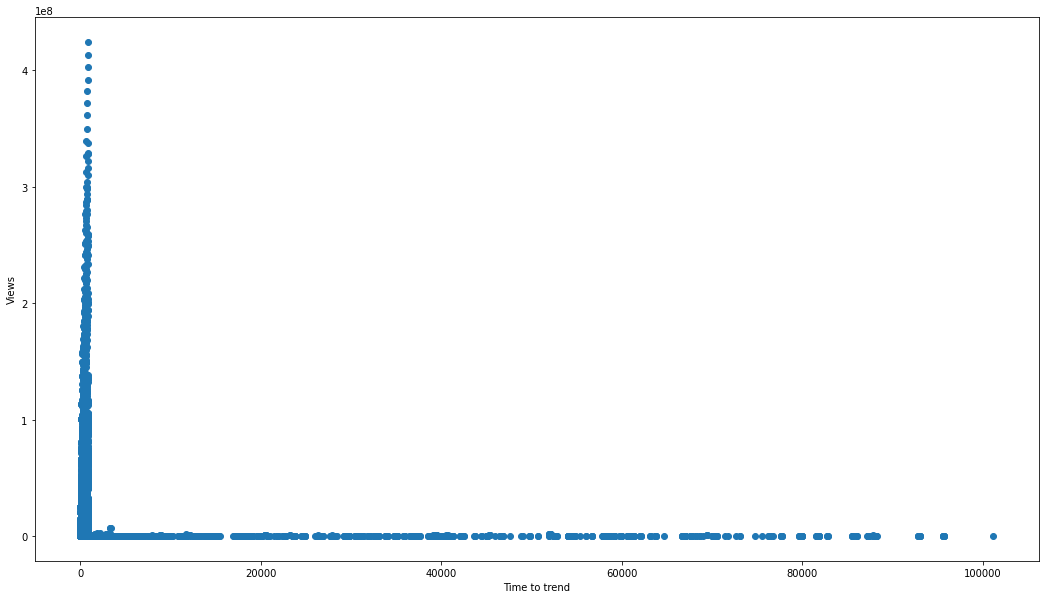

In [74]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(Video_df['hours_to_trending'], Video_df['views'])
 
# x-axis label
ax.set_xlabel('Time to trend')
 
# y-axis label
ax.set_ylabel('Views')
plt.show()